<a href="https://colab.research.google.com/github/mou-pi-ya/Celebal-Technology-.py/blob/main/Document%20Clustering%20for%20Topic%20Modelling%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
!pip install nltk scikit-learn gensim pyLDAvis

In [7]:
import nltk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import gensim
import pyLDAvis.gensim_models
import pyLDAvis

nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [8]:
categories = None  # You can specify a list of specific categories
newsgroups = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'), categories=categories)
documents = newsgroups.data
print("Total documents:", len(documents))

Total documents: 18846


In [9]:
def preprocess(text):
    lemmatizer = WordNetLemmatizer()
    stop_words = set(stopwords.words('english'))
    tokens = gensim.utils.simple_preprocess(text, deacc=True)
    return [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words and len(word) > 3]

processed_docs = [preprocess(doc) for doc in documents]

In [10]:
tfidf_vectorizer = TfidfVectorizer(tokenizer=lambda doc: doc, lowercase=False, max_df=0.5, min_df=10)
X_tfidf = tfidf_vectorizer.fit_transform(processed_docs)

/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [11]:
k = 20
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_tfidf)
labels = kmeans.labels_
print("Silhouette Score (KMeans):", silhouette_score(X_tfidf, labels))

Silhouette Score (KMeans): -0.009661214875670216


In [12]:
import gensim

id2word = gensim.corpora.Dictionary(processed_docs)
corpus = [id2word.doc2bow(text) for text in processed_docs]

lda_model = gensim.models.LdaModel(corpus=corpus,
                                   id2word=id2word,
                                   num_topics=10,
                                   random_state=100,
                                   update_every=1,
                                   passes=10,
                                   alpha='auto',
                                   per_word_topics=True)

In [13]:
for idx, topic in lda_model.print_topics(-1):
    print(f"Topic {idx}: {topic}")

Topic 0: 0.039*"scsi" + 0.011*"cipher" + 0.008*"comic" + 0.007*"libxmu" + 0.007*"copy" + 0.006*"controller" + 0.006*"cover" + 0.005*"wolverine" + 0.005*"appears" + 0.004*"price"
Topic 1: 0.017*"said" + 0.010*"fire" + 0.009*"child" + 0.008*"went" + 0.008*"woman" + 0.007*"people" + 0.007*"came" + 0.005*"started" + 0.005*"told" + 0.005*"home"
Topic 2: 0.009*"space" + 0.007*"year" + 0.007*"state" + 0.005*"research" + 0.005*"program" + 0.005*"president" + 0.005*"information" + 0.005*"national" + 0.004*"university" + 0.004*"nasa"
Topic 3: 0.014*"chip" + 0.014*"government" + 0.013*"encryption" + 0.012*"public" + 0.012*"security" + 0.012*"ripem" + 0.011*"key" + 0.010*"clipper" + 0.009*"privacy" + 0.008*"message"
Topic 4: 0.017*"wire" + 0.013*"circuit" + 0.010*"wiring" + 0.009*"voltage" + 0.008*"ground" + 0.008*"neutral" + 0.007*"captain" + 0.007*"outlet" + 0.005*"homicide" + 0.004*"iranian"
Topic 5: 0.019*"armenian" + 0.014*"israel" + 0.013*"jew" + 0.010*"turkish" + 0.010*"israeli" + 0.010*"ar

In [14]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
pyLDAvis.display(vis)

In [16]:
# Minimal preprocessing code example
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import gensim
import nltk

nltk.download('stopwords')
nltk.download('wordnet')

from sklearn.datasets import fetch_20newsgroups

# Load dataset
newsgroups = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))
documents = newsgroups.data

# Preprocessing
def preprocess(text):
    lemmatizer = WordNetLemmatizer()
    stop_words = set(stopwords.words('english'))
    tokens = gensim.utils.simple_preprocess(text, deacc=True)
    return [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words and len(word) > 3]

processed_docs = [preprocess(doc) for doc in documents]

# Create TF-IDF matrix
tfidf_vectorizer = TfidfVectorizer(tokenizer=lambda doc: doc, lowercase=False, max_df=0.5, min_df=10)
X_tfidf = tfidf_vectorizer.fit_transform(processed_docs)

# Optional: run KMeans clustering to get `labels`
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=20, random_state=42)
labels = kmeans.fit_predict(X_tfidf)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


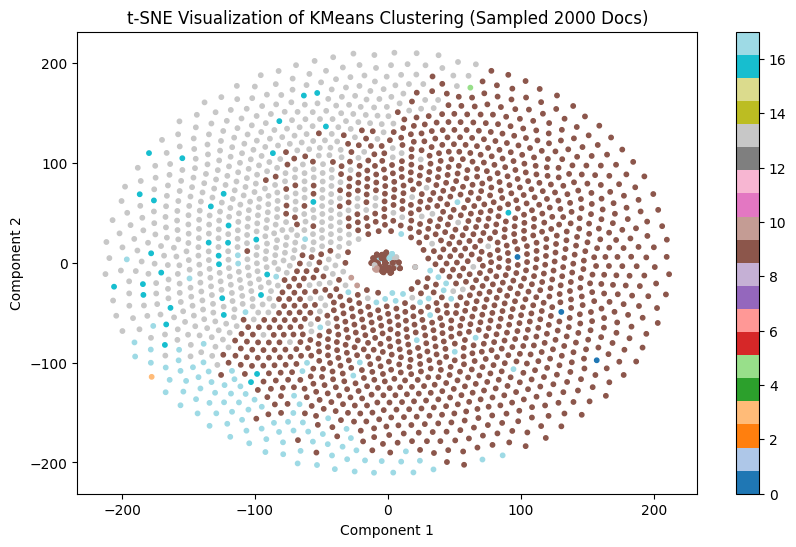

In [17]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import random

n_samples = 2000
indices = random.sample(range(X_tfidf.shape[0]), n_samples)

X_sample = X_tfidf[indices]
labels_sample = [labels[i] for i in indices]

X_embedded = TSNE(n_components=2, perplexity=30, random_state=42).fit_transform(X_sample.toarray())

plt.figure(figsize=(10, 6))
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=labels_sample, cmap='tab20', s=10)
plt.title("t-SNE Visualization of KMeans Clustering (Sampled 2000 Docs)")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.colorbar()
plt.show()